<a href="https://colab.research.google.com/github/kushpal/Machine-Learning/blob/master/Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  For the following X and y, use scikit-learn to learn a linear model.



```
X=[[1,2], [2, 4], [3, 6],[4,8]]
y=[2,3,4,5]
```



In [0]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x_train=[[1,2], [2, 4], [3, 6],[4,8]]
y_train=[2,3,4,5]
reg.fit(x_train,y_train)
print("coef : ",reg.coef_)
print("Intercept : ",reg.intercept_)

coef :  [ 0.2  0.4]
Intercept :  1.0


---
**Solve the problem using normal equations. You may find that one of the matrix in the normal equation is non-invertible. Why does the matrix turn out to be non-invertible? Why can scikit-learn implementation still correctly solve this regression problem?**
 
 ---

In [0]:
x=np.asarray(x_train)
y=np.asarray(y_train)
xt=x.transpose()
m=np.matmul(xt,x)
y=np.matmul(xt,y)
np.linalg.inv(m)

LinAlgError: Singular matrix

> From the above error,  matrix Xt*X is not invertible. Scikit learn can do that because it uses LU decomposition. As seen, the second column is linearly dependent on the first column. 

---
Show the usage of scikit learn’s linear regression module for the real estate price prediction regression problem. What is the RMS error on the test set?

---

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [0]:
data=pd.read_csv("Real_estate_valuation_data_set.csv")

In [0]:
data=data.drop(columns=['No'])
data.head(3)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3


In [0]:
x_train1=data.drop(columns=['Y house price of unit area'])

In [0]:
y_train1=data['Y house price of unit area']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_train1, y_train1, test_size=0.2, random_state=42)

In [0]:
regr = linear_model.LinearRegression()

In [0]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_pred = regr.predict(X_test)


In [0]:
c=0
for i in x_train1.columns: 
    print(i," : ",regr.coef_[c])
    c=c+1
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))

X1 transaction date  :  5.44074185669
X2 house age  :  -0.270791489962
X3 distance to the nearest MRT station  :  -0.00475863891729
X4 number of convenience stores  :  1.09142526769
X5 latitude  :  229.043053815
X6 longitude  :  -29.4925907762
Mean squared error: 53.51
Variance score: 0.68


---
**What can you comment about the importance of different features?**

---

The coefficient value represents the mean change in the response given a one-unit increase in the predictor. Variables with larger coefficients are more valuable because they represent a larger change in the response, but larger coefficients don’t necessarily identify more important features.

---

**After standardization of the dataset in a scale of 0 to 1. Re-learn the regression co-efficients.**

---

In [0]:
data=pd.read_csv("Real_estate_valuation_data_set.csv")

data.head(2)
data=data.drop(columns=['No'])
from sklearn import preprocessing

names = data.columns
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=names)

data=scaled_data

x_train=data.drop(columns=['Y house price of unit area'])

y_train=data['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.6f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.6f' % r2_score(y_test,y_pred))

Coefficients: 
 [ 0.04534777 -0.10792236 -0.279917    0.09931076  0.17198028 -0.02488756]
Mean squared error: 0.004430
Variance score: 0.681058


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


 ---

 **What is the distribution of the residuals?**

 ---
Ans : Normal distribution as we can see bellow figure.

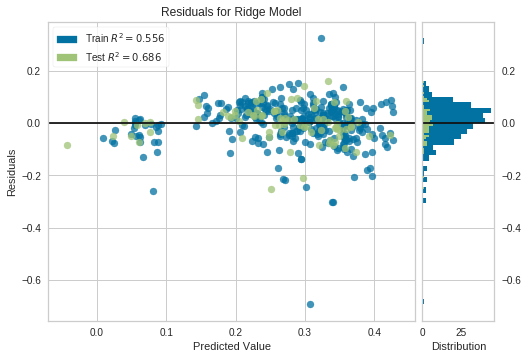

In [0]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()                 


---
**Use cross-validation to find the optimal set of features to use for regression.**

---
>(i). Using all possible feature sets of length 1, 2, 3, or 4, what is the optimal feature set as per the validation set and how does this set of features perform on the test set wrt the model learnt on the entire feature set?

In [0]:
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
import math
d = pd.read_csv('realstate1.csv')
d1 = pd.read_csv('xyz.csv')
d.head(5)
d = d.drop(['No'],axis = 1)
d1 = d1.drop(['No'],axis=1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#df = StandardScaler().fit_transform(d[['a','b','c','d','e','f']])
X_train1, X_test1, y_train1, y_test1 = train_test_split(d[['a','b','c','d','e','f']], d['Y house price of unit area'], test_size=0.20, random_state=42)
col = ['a','b','c','d','e','f']
a = 0
maxa = 10000000000000
optf = [[],[]]
for i in (0,5):
    for j in range(i+1,6):
        c = [col[i],col[j]]
        m = LR()
        m.fit(X_train1[c],y_train1)
        pre = m.predict(X_test1[c])
        acc = mean_squared_error(y_test1,pre)
        if(acc<maxa):
            optf[0] = c
            maxa = acc
for i in (0,5):
    for j in range(i+1,6):
        for k in range(j+1,6):
            c = [col[i],col[j],col[k]]
            m = LR()
            m.fit(X_train1[c],y_train1)
            pre = m.predict(X_test1[c])
            acc = mean_squared_error(y_test1,pre)
            print(math.sqrt(acc))
            if(acc<maxa):
                optf[0] = c
                maxa = acc
for i in (0,5):
    for j in range(i+1,6):
        for k in range(j+1,6):
            for l in range(k+1,6):
                if k == 4:
                    a = acc
                    cl = [col[i],col[j],col[k],col[l]]
                c = [col[i],col[j],col[k],col[l]]
                m = LR()
                m.fit(X_train1[c],y_train1)
                pre = m.predict(X_test1[c])
                acc = math.sqrt(mean_squared_error(y_test1,pre))
                if(acc<maxa):
                    optf[0] = c
                    maxa = acc
print("Optimal Root Mean squared error:",maxa)
print("columns of the max accuracy:",optf[0])

8.157649604288343
9.583493319738015
9.75616166309226
9.636513918220805
7.989861203449031
8.41667687368518
8.574692661371403
9.039948671918054
8.7632082627033
8.99498495403994
Optimal Root Mean squared error: 7.491074028327393
columns of the max accuracy: ['a', 'b', 'c', 'd']


>(ii) Use Sequential Forward Selection (or Stepwise Forward Selection) which is a greedy procedure to find the optimal set of features. How does this how does it perform on the test set wrt the model learnt on the
entire feature set?

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train1, X_test1, y_train1, y_test1 = train_test_split(d1[['b','a','d','e','f','c']], d['Y house price of unit area'], test_size=0.20, random_state=42)
col = ['b','a','d','e','f','c']
a = 0

a = 0
maxa = 10000000000000
optf = [[],[]]
for i in (0,5):
    for j in range(i+1,6):
        c = [col[i],col[j]]
        m = LR()
        m.fit(X_train1[c],y_train1)
        pre = m.predict(X_test1[c])
        acc = mean_squared_error(y_test1,pre)
        if(acc<maxa):
            optf[0] = c
            maxa = acc
for i in (0,5):
    for j in range(i+1,6):
        for k in range(j+1,6):
            c = [col[i],col[j],col[k]]
            m = LR()
            m.fit(X_train1[c],y_train1)
            pre = m.predict(X_test1[c])
            acc = mean_squared_error(y_test1,pre)
            print("ACC: ",acc)
            if(acc<maxa):
                optf[0] = c
                maxa = acc
for i in (0,5):
    for j in range(i+1,6):
        for k in range(j+1,6):
            for l in range(k+1,6):
                if k == 4:
                    a = acc
                    cl = [col[i],col[j],col[k],col[l]]
                c = [col[i],col[j],col[k],col[l]]
                m = LR()
                m.fit(X_train1[c],y_train1)
                pre = m.predict(X_test1[c])
                acc = (mean_squared_error(y_test1,pre))
                if(acc<maxa):
                    optf[0] = c
                    maxa = acc
for i in (0,5):
    for j in range(i+1,6):
        for k in range(j+1,6):
            for l in range(k+1,6):
                for m in range(l+1,6):
                    c = [col[i],col[j],col[k],col[l]]
                    m = LR()
                    m.fit(X_train1[c],y_train1)
                    pre = m.predict(X_test1[c])
                    acc = (mean_squared_error(y_test1,pre))
                    if(acc<maxa):
                        optf[0] = c
                        maxa = acc
for i in (0,5):
    for j in range(i+1,6):
        for k in range(j+1,6):
            for l in range(k+1,6):
                for m in range(l+1,6):
                        c = [col[i],col[j],col[k],col[l]]
                        m = LR()
                        m.fit(X_train1[c],y_train1)
                        pre = m.predict(X_test1[c])
                        acc = (mean_squared_error(y_test1,pre))
                        if(acc<maxa):
                            optf[0] = c
                            maxa = acc
print("Max Accuracy Error:",optf[0])
print("Optimal columns:",maxa)

ACC:  66.5472470663
ACC:  91.8433442095
ACC:  95.1826903964
ACC:  92.8624004961
ACC:  63.8378820504
ACC:  70.840449596
ACC:  73.525354237
ACC:  81.7206719909
ACC:  76.7938190555
ACC:  80.9097543234
Max Accuracy Error: ['b', 'a', 'd', 'e']
Optimal columns: 56.1161900979


---
**Write a function normalEquationRegression(X, y) where X is our feature matrix containing N samples
(rows) and d features (columns) and y is our output vector containing N samples. This function returns a
vector θ containing d + 1 rows. You are free to use numpy’s matrix inverse, determinant and multiplication
routines**

---

In [0]:
def normalEquationRegression(X, y):
    X=np.asarray(X)
    Xt=X.transpose()
    p=np.matmul(Xt, X)
    p=np.asmatrix(p)
    ip=p.I
    xt_ip=np.matmul(ip,Xt)
    theta=np.matmul(xt_ip,y)
    theta=np.asarray(theta)
    return theta

In [0]:

x_train=data.drop(columns=['Y house price of unit area'])

y_train=data['Y house price of unit area']

In [0]:
y=normalEquationRegression(x_train,y_train)

In [0]:
y

array([[ 0.05014246, -0.09570323, -0.05192737,  0.12494262,  0.26438199,
         0.19434698]])

---
**Write a function gradientDescentRegression(X, y, alpha = 0.1) to learn the regression coefficients using
gradient descent. You have to write the formulae for gradient wrt the different θ j ∀ j ∈ ( 1, ..d )**

---

In [0]:
def gradientDescentRegression(X, y, alpha = 0.1):
    past_costs = []
    theta = np.random.rand(X.shape[1])
    past_thetas = [theta]
    m = y.size
    min1=100000
    theta_c=41100
    for i in range(200):
        prediction = np.dot(X, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        if min1>cost:
            min1=cost
            theta_c=theta
        past_thetas.append(theta)
        
    return past_thetas, past_costs,theta_c
        

In [0]:
x=x_train
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]  
past_thetas, past_costs,theta_c=gradientDescentRegression(x,y_train)
print("Gradient-Descent :",theta_c)

Gradient-Descent : [ 0.27643488  0.01030833 -0.02886982  0.00780445  0.0424255   0.03983845
  0.04101678]


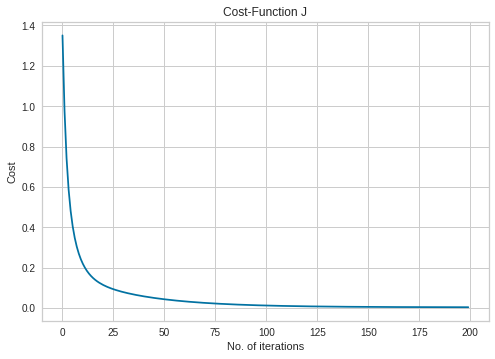

In [0]:
plt.title('Cost-Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

---
**Write a function gradientDescentAutogradRegression(X, y, alpha = 0.1) to learn the regression coefficients using gradient descent. Instead of writing the formulae for computing gradients by yourself, you will
use Autograd to automatically do that for you**

---

In [0]:
import autograd.numpy as np 
from autograd import grad   
from autograd import jacobian

In [0]:

def gradientDescentAutogradRegression(X, y, alpha = 0.1):
    theta = np.random.rand(X.shape[1])
    m = y.size
    theta_c=0
    min1=100000
    prediction = np.dot(X, theta)
    error = prediction - y
    cost = 1/(2*m) * np.dot(error.T, error)
    theta = theta - (alpha * (1/m) * np.dot(X.T, error.T))
    if min1>cost:
        min1=cost
        theta_c=theta
    return theta_c

In [0]:
min1=100000
autograd=jacobian(gradientDescentAutogradRegression)


In [0]:
y_train=np.asarray(y_train)
past_thetas=autograd(x,y_train)
print(past_thetas[-1][-1][-1])

-0.000388279991329


---

**Write a function gradientDescentPyTorchRegression(X, y, alpha = 0.1) to learn the regression coefficients using gradient descent. Instead of numpy, you would now be using PyTorch. Similar to Autograd linked in the previous question, PyTorch also has an automatic gradient computation routine that you should make use of. Please note that do not use
nn.Linear() for this question**

---

In [0]:
import torch
def gradientDescentPyTorchRegression(X, y, alpha = 0.1):
    torch.manual_seed(0)
    N = 100
    x = torch.rand(N,1)*5
    y = 2.3 + 5.1*x
    y_obs = y + 0.2*torch.randn(N,1)

    w = torch.randn(1, requires_grad=True)
    b = torch.randn(1, requires_grad=True)

    gamma = 0.01
    for i in range(500):
        print(i)
        y_pred = w * x + b
        mse = torch.mean((y_pred - y_obs) ** 2)

    # backward
        mse.backward()
        print('slope  :', w)
        print('Bias:', b)
        print('slope.grad:', w.grad)
        print('Bias.grad:', b.grad)

        with torch.no_grad():
            w = w - gamma * w.grad
            b = b - gamma * b.grad
        w.requires_grad = True
        b.requires_grad = True

In [0]:
gradientDescentPyTorchRegression(x, y_train)

0
slope  : tensor([0.4988], requires_grad=True)
Bias: tensor([-0.5233], requires_grad=True)
slope.grad: tensor([-88.3076])
Bias.grad: tensor([-28.1188])
1
slope  : tensor([1.3819], requires_grad=True)
Bias: tensor([-0.2421], requires_grad=True)
slope.grad: tensor([-72.6094])
Bias.grad: tensor([-23.2433])
2
slope  : tensor([2.1080], requires_grad=True)
Bias: tensor([-0.0097], requires_grad=True)
slope.grad: tensor([-59.6959])
Bias.grad: tensor([-19.2320])
3
slope  : tensor([2.7049], requires_grad=True)
Bias: tensor([0.1826], requires_grad=True)
slope.grad: tensor([-49.0730])
Bias.grad: tensor([-15.9317])
4
slope  : tensor([3.1956], requires_grad=True)
Bias: tensor([0.3419], requires_grad=True)
slope.grad: tensor([-40.3345])
Bias.grad: tensor([-13.2163])
5
slope  : tensor([3.5990], requires_grad=True)
Bias: tensor([0.4741], requires_grad=True)
slope.grad: tensor([-33.1461])
Bias.grad: tensor([-10.9819])
6
slope  : tensor([3.9305], requires_grad=True)
Bias: tensor([0.5839], requires_grad=

slope  : tensor([5.3912], requires_grad=True)
Bias: tensor([1.3395], requires_grad=True)
slope.grad: tensor([0.1524])
Bias.grad: tensor([-0.4978])
56
slope  : tensor([5.3896], requires_grad=True)
Bias: tensor([1.3445], requires_grad=True)
slope.grad: tensor([0.1520])
Bias.grad: tensor([-0.4953])
57
slope  : tensor([5.3881], requires_grad=True)
Bias: tensor([1.3494], requires_grad=True)
slope.grad: tensor([0.1515])
Bias.grad: tensor([-0.4928])
58
slope  : tensor([5.3866], requires_grad=True)
Bias: tensor([1.3544], requires_grad=True)
slope.grad: tensor([0.1510])
Bias.grad: tensor([-0.4903])
59
slope  : tensor([5.3851], requires_grad=True)
Bias: tensor([1.3593], requires_grad=True)
slope.grad: tensor([0.1505])
Bias.grad: tensor([-0.4879])
60
slope  : tensor([5.3836], requires_grad=True)
Bias: tensor([1.3641], requires_grad=True)
slope.grad: tensor([0.1499])
Bias.grad: tensor([-0.4855])
61
slope  : tensor([5.3821], requires_grad=True)
Bias: tensor([1.3690], requires_grad=True)
slope.grad:

Bias.grad: tensor([-0.3734])
115
slope  : tensor([5.3108], requires_grad=True)
Bias: tensor([1.5990], requires_grad=True)
slope.grad: tensor([0.1153])
Bias.grad: tensor([-0.3716])
116
slope  : tensor([5.3096], requires_grad=True)
Bias: tensor([1.6027], requires_grad=True)
slope.grad: tensor([0.1148])
Bias.grad: tensor([-0.3698])
117
slope  : tensor([5.3085], requires_grad=True)
Bias: tensor([1.6064], requires_grad=True)
slope.grad: tensor([0.1142])
Bias.grad: tensor([-0.3680])
118
slope  : tensor([5.3073], requires_grad=True)
Bias: tensor([1.6101], requires_grad=True)
slope.grad: tensor([0.1137])
Bias.grad: tensor([-0.3662])
119
slope  : tensor([5.3062], requires_grad=True)
Bias: tensor([1.6137], requires_grad=True)
slope.grad: tensor([0.1131])
Bias.grad: tensor([-0.3644])
120
slope  : tensor([5.3050], requires_grad=True)
Bias: tensor([1.6174], requires_grad=True)
slope.grad: tensor([0.1126])
Bias.grad: tensor([-0.3627])
121
slope  : tensor([5.3039], requires_grad=True)
Bias: tensor([1

slope  : tensor([5.2489], requires_grad=True)
Bias: tensor([1.7984], requires_grad=True)
slope.grad: tensor([0.0854])
Bias.grad: tensor([-0.2750])
178
slope  : tensor([5.2480], requires_grad=True)
Bias: tensor([1.8011], requires_grad=True)
slope.grad: tensor([0.0849])
Bias.grad: tensor([-0.2737])
179
slope  : tensor([5.2472], requires_grad=True)
Bias: tensor([1.8039], requires_grad=True)
slope.grad: tensor([0.0845])
Bias.grad: tensor([-0.2724])
180
slope  : tensor([5.2463], requires_grad=True)
Bias: tensor([1.8066], requires_grad=True)
slope.grad: tensor([0.0841])
Bias.grad: tensor([-0.2710])
181
slope  : tensor([5.2455], requires_grad=True)
Bias: tensor([1.8093], requires_grad=True)
slope.grad: tensor([0.0837])
Bias.grad: tensor([-0.2697])
182
slope  : tensor([5.2446], requires_grad=True)
Bias: tensor([1.8120], requires_grad=True)
slope.grad: tensor([0.0833])
Bias.grad: tensor([-0.2684])
183
slope  : tensor([5.2438], requires_grad=True)
Bias: tensor([1.8147], requires_grad=True)
slope

slope  : tensor([5.2050], requires_grad=True)
Bias: tensor([1.9398], requires_grad=True)
slope.grad: tensor([0.0641])
Bias.grad: tensor([-0.2065])
237
slope  : tensor([5.2043], requires_grad=True)
Bias: tensor([1.9419], requires_grad=True)
slope.grad: tensor([0.0638])
Bias.grad: tensor([-0.2055])
238
slope  : tensor([5.2037], requires_grad=True)
Bias: tensor([1.9440], requires_grad=True)
slope.grad: tensor([0.0635])
Bias.grad: tensor([-0.2045])
239
slope  : tensor([5.2031], requires_grad=True)
Bias: tensor([1.9460], requires_grad=True)
slope.grad: tensor([0.0632])
Bias.grad: tensor([-0.2036])
240
slope  : tensor([5.2024], requires_grad=True)
Bias: tensor([1.9480], requires_grad=True)
slope.grad: tensor([0.0629])
Bias.grad: tensor([-0.2026])
241
slope  : tensor([5.2018], requires_grad=True)
Bias: tensor([1.9501], requires_grad=True)
slope.grad: tensor([0.0626])
Bias.grad: tensor([-0.2016])
242
slope  : tensor([5.2012], requires_grad=True)
Bias: tensor([1.9521], requires_grad=True)
slope

Bias.grad: tensor([-0.1521])
300
slope  : tensor([5.1696], requires_grad=True)
Bias: tensor([2.0537], requires_grad=True)
slope.grad: tensor([0.0470])
Bias.grad: tensor([-0.1514])
301
slope  : tensor([5.1691], requires_grad=True)
Bias: tensor([2.0553], requires_grad=True)
slope.grad: tensor([0.0468])
Bias.grad: tensor([-0.1507])
302
slope  : tensor([5.1687], requires_grad=True)
Bias: tensor([2.0568], requires_grad=True)
slope.grad: tensor([0.0465])
Bias.grad: tensor([-0.1499])
303
slope  : tensor([5.1682], requires_grad=True)
Bias: tensor([2.0583], requires_grad=True)
slope.grad: tensor([0.0463])
Bias.grad: tensor([-0.1492])
304
slope  : tensor([5.1677], requires_grad=True)
Bias: tensor([2.0597], requires_grad=True)
slope.grad: tensor([0.0461])
Bias.grad: tensor([-0.1485])
305
slope  : tensor([5.1673], requires_grad=True)
Bias: tensor([2.0612], requires_grad=True)
slope.grad: tensor([0.0459])
Bias.grad: tensor([-0.1478])
306
slope  : tensor([5.1668], requires_grad=True)
Bias: tensor([2

361
slope  : tensor([5.1447], requires_grad=True)
Bias: tensor([2.1339], requires_grad=True)
slope.grad: tensor([0.0349])
Bias.grad: tensor([-0.1126])
362
slope  : tensor([5.1444], requires_grad=True)
Bias: tensor([2.1350], requires_grad=True)
slope.grad: tensor([0.0348])
Bias.grad: tensor([-0.1121])
363
slope  : tensor([5.1440], requires_grad=True)
Bias: tensor([2.1361], requires_grad=True)
slope.grad: tensor([0.0346])
Bias.grad: tensor([-0.1115])
364
slope  : tensor([5.1437], requires_grad=True)
Bias: tensor([2.1372], requires_grad=True)
slope.grad: tensor([0.0344])
Bias.grad: tensor([-0.1110])
365
slope  : tensor([5.1434], requires_grad=True)
Bias: tensor([2.1383], requires_grad=True)
slope.grad: tensor([0.0343])
Bias.grad: tensor([-0.1104])
366
slope  : tensor([5.1430], requires_grad=True)
Bias: tensor([2.1394], requires_grad=True)
slope.grad: tensor([0.0341])
Bias.grad: tensor([-0.1099])
367
slope  : tensor([5.1427], requires_grad=True)
Bias: tensor([2.1405], requires_grad=True)
s

Bias.grad: tensor([-0.0858])
418
slope  : tensor([5.1273], requires_grad=True)
Bias: tensor([2.1901], requires_grad=True)
slope.grad: tensor([0.0265])
Bias.grad: tensor([-0.0854])
419
slope  : tensor([5.1270], requires_grad=True)
Bias: tensor([2.1909], requires_grad=True)
slope.grad: tensor([0.0264])
Bias.grad: tensor([-0.0850])
420
slope  : tensor([5.1268], requires_grad=True)
Bias: tensor([2.1918], requires_grad=True)
slope.grad: tensor([0.0262])
Bias.grad: tensor([-0.0846])
421
slope  : tensor([5.1265], requires_grad=True)
Bias: tensor([2.1926], requires_grad=True)
slope.grad: tensor([0.0261])
Bias.grad: tensor([-0.0842])
422
slope  : tensor([5.1262], requires_grad=True)
Bias: tensor([2.1935], requires_grad=True)
slope.grad: tensor([0.0260])
Bias.grad: tensor([-0.0837])
423
slope  : tensor([5.1260], requires_grad=True)
Bias: tensor([2.1943], requires_grad=True)
slope.grad: tensor([0.0259])
Bias.grad: tensor([-0.0833])
424
slope  : tensor([5.1257], requires_grad=True)
Bias: tensor([2

Bias: tensor([2.2327], requires_grad=True)
slope.grad: tensor([0.0201])
Bias.grad: tensor([-0.0648])
476
slope  : tensor([5.1139], requires_grad=True)
Bias: tensor([2.2333], requires_grad=True)
slope.grad: tensor([0.0200])
Bias.grad: tensor([-0.0644])
477
slope  : tensor([5.1137], requires_grad=True)
Bias: tensor([2.2340], requires_grad=True)
slope.grad: tensor([0.0199])
Bias.grad: tensor([-0.0641])
478
slope  : tensor([5.1135], requires_grad=True)
Bias: tensor([2.2346], requires_grad=True)
slope.grad: tensor([0.0198])
Bias.grad: tensor([-0.0638])
479
slope  : tensor([5.1133], requires_grad=True)
Bias: tensor([2.2353], requires_grad=True)
slope.grad: tensor([0.0197])
Bias.grad: tensor([-0.0635])
480
slope  : tensor([5.1131], requires_grad=True)
Bias: tensor([2.2359], requires_grad=True)
slope.grad: tensor([0.0196])
Bias.grad: tensor([-0.0632])
481
slope  : tensor([5.1129], requires_grad=True)
Bias: tensor([2.2365], requires_grad=True)
slope.grad: tensor([0.0195])
Bias.grad: tensor([-0.

**In this question, we will be implementing polynomial regression as a special case of linear regression. First, we
will be generating some data.**



```
import numpy as np
x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
y = 1*x**5 + 3*x**4 - 100*x**3 + 8*x**2 -300*x - 1e5 + np.random.randn(len(x))*1e5
```

Now, we want to learn a polynomial function of degree p on this dataset, i.e. y = θ 0 + θ 1 × x 1 + θ 2 × x 2 + ...θ p × x p . We can use our developed linear regression implementations for doing so, by transforming our dataset and creating the matrix X containing columns corresponding to x 0 , x 1 , x 2 , ..., x p . Using any of your implementations learn the regression coefficients for p = 5 and p = 4. How close are your coefficients for p = 5 to the ones used to generate
the data?


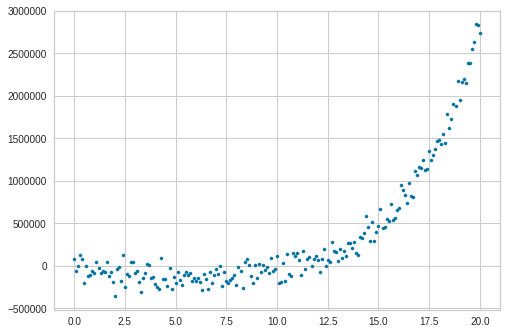

In [0]:
import matplotlib.pyplot as plt
x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
y = 1*x**5 + 3*x**4 - 100*x**3 + 8*x**2 -300*x - 1e5 + np.random.randn(len(x))*1e5
plt.scatter(x,y, s=10)
plt.show()

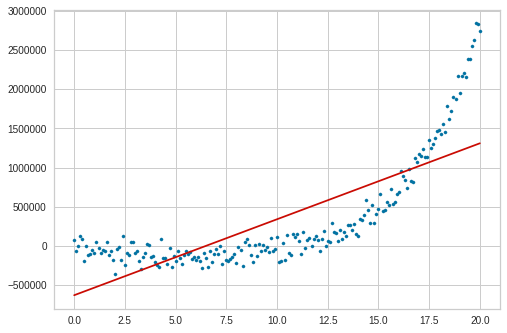

In [0]:
from sklearn.linear_model import LinearRegression
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

97206.7866558
0.981843795362


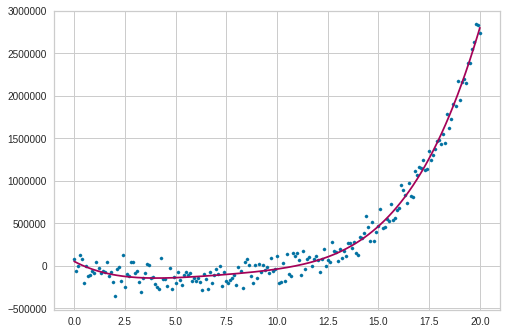

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
#sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [0]:
# for degree 4
import numpy as np
import pandas as pd
x1 = np.arange(0, 20.1, 0.1)
np.random.seed(0)
y1 =  3*x1**4 - 100*x1**3 + 8*x1**2 -300*x1 - 1e5+np.random.randn(len(x1))*1e5
x_z = np.ndarray(shape=(201,4), dtype=float, order='F')
#print(len(y))
for i in range(0,len(x1)):
    x_z[i] = ([x1[i]**4,x1[i]**3,x1[i]**2,x1[i]**1])
ycy =x_z
dy = y1
ycy = (ycy - ycy.mean()) / ycy.std()
ycy = np.c_[np.ones(ycy.shape[0]), ycy] 
past_theta= gradientDescentRegression(ycy,dy)    
print("Co-efficients of the given matrix by using gredient descent:",past_theta[0][0])


Co-efficients of the given matrix by using gredient descent: [ 0.01642963  0.92952932  0.66991655  0.78515291  0.28173011]


96145.3382987
0.982238143426


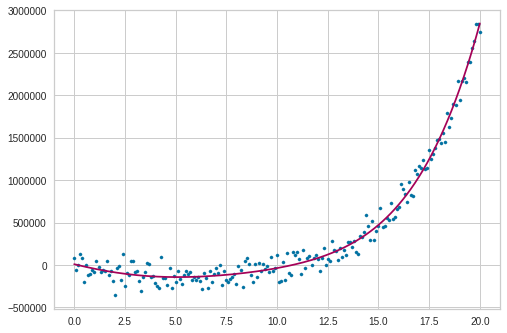

In [0]:
polynomial_features= PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
#sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x1, y_poly_pred = zip(*sorted_zip)
plt.plot(x1, y_poly_pred, color='m')
plt.show()

In [0]:
# for p = 5
import numpy as np
import pandas as pd
x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
y = 1*x**5 + 3*x**4 - 100*x**3 + 8*x**2 -300*x - 1e5+np.random.randn(len(x))*1e5
x_z = np.ndarray(shape=(201,5), dtype=float, order='F')
#print(len(y))
for i in range(0,len(x)):
    x_z[i] = ([x[i]**5,x[i]**4,x[i]**3,x[i]**2,x[i]**1])
dx = x_z
dy = y
theta = gradientDescentRegression(dx,dy)    
print("Co-efficients of the given matrix by using gredient descent:",theta[0][0])

Co-efficients of the given matrix by using gredient descent: [ 0.01642963  0.92952932  0.66991655  0.78515291  0.28173011]


**The following question is to aid our understanding of gradient descent.**

>Create a contour plot in the θ 0 and θ 1 space of the residual sum of squares

Text(0.5,0,'$RSS$')

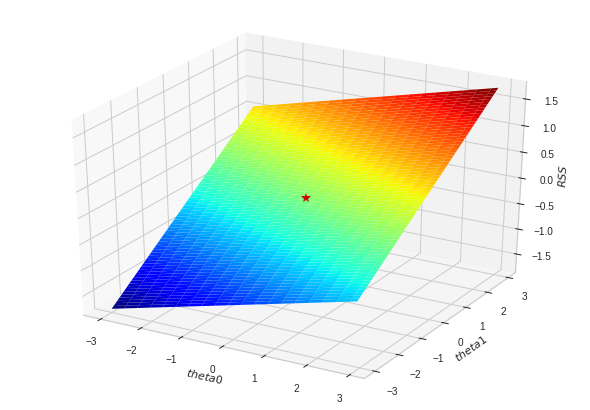

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

def func_z(x, y):
    z = .2*x + .4*y
    return z
a = np.arange(-3, 3, 0.08)
b = np.arange(-3, 3, 0.08)

theta0, theta1 = np.meshgrid(a, b)
RSS = func_z(theta0, theta1)

fig1 = plt.figure()
ax1 = Axes3D(fig1)
surf = ax1.plot_surface(theta0, theta1, RSS, edgecolor='none', rstride=1,
                        cstride=4, cmap='jet')

min_point = np.array([0., 0.])
min_point_ = min_point[:, np.newaxis]
ax1.plot(*min_point_, func_z(*min_point_), 'r*', markersize=10)

ax1.set_xlabel(r'$theta0$')
ax1.set_ylabel(r'$theta1$')
ax1.set_zlabel(r'$RSS$')

>Create a Matplotlib where the plot contains two columns: the first one being the contour plot and the second one being the linear regression fit on the data. The different frames in the animation correspond
to different iterations of gradient descent applied on the dataset to learn θ 0 and θ 1 . For each iteration, draw the current value of θ 0 and θ 1 on the contour plot and also an arrow to the next θ 0 and θ 1 as learnt by gradient update rule. Correspondingly draw the y = θ 0 + θ 1 × x line on the other subplot showing the scatter plot. The overall title of the plot show be the iteration number and the residual sum of squares. You are free to use any gradient desent implementation.

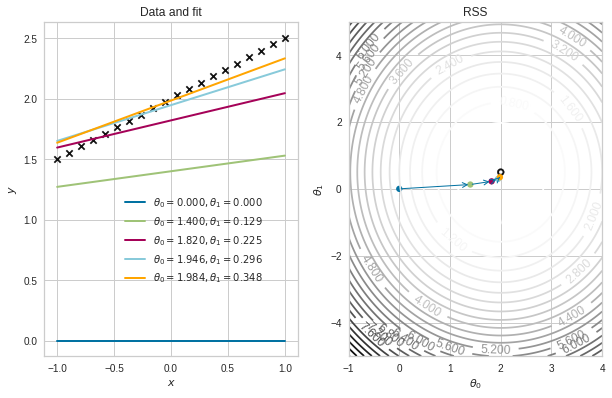

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time

m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    return theta0 + theta1*x

theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)

ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])


N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('RSS')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')
time.sleep(2) 
plt.show()